# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Seprianto Ray Roganda Sianipar
- Email: raysianipar15@gmail.com
- Id Dicoding: seprianto15

## Menentukan Pertanyaan Bisnis

- Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Tahun Terakhir?
- Produk Apa yang memiliki harga termahal dan terendah?
- Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?
- Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?
- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian?
- Berapa banyak uang yang telah dihabiskan pelanggan?

## Menyiapkan semua library yang dibuthkan

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Gathering Data

### Load tabel customers

In [254]:
customers_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Load tabel order_items

In [255]:
order_items_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Load tabel order_payments


In [256]:
order_payments_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\order_payments_dataset.csv")
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


### Load tabel order_reviews

In [257]:
order_reviews_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\order_reviews_dataset.csv")
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


### Load tabel orders

In [258]:
orders_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


### Load tabel products

In [259]:
products_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### Load tabel sellers

In [260]:
sellers_df = pd.read_csv(r"C:\Users\dell\Desktop\submission\data\sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


## Data Wrangling

### Assessing Data

#### Menilai Data customers_df

In [261]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [262]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


##### Hasil Penilaian Data customers_df

* Tidak ada kesalahan tipe data
* Tidak ada missing value
* Tidak ada duplikat data
* Tidak ada inaccurate value







#### Menilai Data order_items_df

In [263]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [264]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())
order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


##### Hasil Penilaian Data order_items_df

* Tipe data pada kolom shipping_limit_date perlu diubah menjadi datetime
* Tidak ada missing value
* Tidak ada duplikat data
* Tidak ada inaccurate value



#### Menilai Data order_payments_df

In [265]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [266]:
print("Jumlah duplikasi: ", order_payments_df.duplicated().sum())
order_payments_df.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


##### Hasil Penilaian Data order_payments_df

* Tipe data tidak ada yang perlu diubah
* Tidak ada missing value
* Tidak ada duplikat data
* Tidak ada innacurate value



#### Menilai Data order_reviews_df

In [267]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [268]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [269]:
print("Jumlah duplikasi: ", order_reviews_df.duplicated().sum())
order_reviews_df.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


##### Hasil Penilaian Data order_reviews_df

* Tipe data pada kolom review_creation_date dan review_answer_timestamp perlu diubah menjadi datetime
* Terdapat missing value pada kolom review_comment_title dan review_comment_message
* Tidak ada duplikasi data
* Tidak ada inaccurate value



#### Menilai Data orders_df

In [270]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [271]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [272]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


##### Hasil Penilaian Data orders_df

* Tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date perlu diubah menjadi datetime
* Terdapat missing value pada kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date
* Tidak ada duplikat data
* Tidak ada innaccurate data

#### Menilai Data products_df

In [273]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [274]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [275]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


##### Hasil Penilaian Data products_df
* Tidak ada tipe data yang perlu diubah
* Terdapat missing value pada kolom product_category_name, product_name_length, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm dan product_width_cm
* Tidak ada duplikasi data
* Tidak ada innaccurate data

#### Menilai Data sellers_df

In [276]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [277]:
print("Jumlah duplikasi: ", sellers_df.duplicated().sum())
sellers_df.describe()

Jumlah duplikasi:  0


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


##### Hasil Penilaian Data sellers_df
* Tipe data tidak ada yang perlu diubah
* Tidak ada missing value
* Tidak ada duplikat data
* Tidak ada innaccurate value

### Cleaning Data

#### Membersihkan Data order_items_df

##### **Mengubah Tipe Data**

Mengubah tipe data pada kolom shipping_limit_date dari tipe data object menjadi datetime

In [278]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [279]:
order_items_df["shipping_limit_date"] = pd.to_datetime(order_items_df["shipping_limit_date"])

In [280]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### Membersihkan Data order_reviews_df

##### **Mengubah Tipe Data**

Mengubah tipe data pada kolom review_creation_date dan review_answer_stamp dari tipe data object menjadi datetime

In [281]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [282]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]

for column in datetime_columns:
  order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [283]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


##### **Menangani Missing Value**

Menangani missing value pada kolom review_comment_title dan review_comment_message dengan metode imputation

In [284]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [285]:
order_reviews_df[order_reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01,2018-07-02 12:59:13


In [286]:
order_reviews_df.review_comment_title.value_counts()

review_comment_title
Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: count, Length: 4527, dtype: int64

In [287]:
order_reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)

In [288]:
order_reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title           0
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [289]:
order_reviews_df[order_reviews_df.review_comment_message.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,NaN,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,NaN,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,NaN,2018-02-17,2018-02-18 14:36:24
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,Recomendo,NaN,2018-04-13,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,Recomendo,NaN,2017-07-16,2017-07-18 19:30:34
...,...,...,...,...,...,...,...
99217,c6b270c61f67c9f7cb07d84ea8aeaf8b,48f7ee67313eda32bfcf5b9c1dd9522d,5,Recomendo,NaN,2017-12-13,2017-12-14 11:09:36
99218,af2dc0519de6e0720ef0c74292fb4114,d699c734a0b1c8111f2272a3f36d398c,5,Recomendo,NaN,2018-04-27,2018-04-30 01:18:57
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,NaN,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,NaN,2017-12-09,2017-12-11 20:06:42


In [290]:
order_reviews_df.review_comment_message.fillna(method="bfill", inplace=True)

In [291]:
order_reviews_df.isna().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### Membersihkan Data orders_df

##### **Mengubah Tipe Data**

Mengubah tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date dan order_estimated_delivery_date dari tipe data object menjadi datetime.



In [292]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [293]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                   "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

In [294]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


##### **Menangani Missing Value**

Menangani missing value pada kolom order_approved_at, order_delivered_carrier_date dan order_delivered_customer_date dengan metode imputation

In [295]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [296]:
orders_df[orders_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


In [297]:
orders_df.order_approved_at.fillna(method="ffill", inplace=True)

In [298]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [299]:
orders_df[orders_df.order_delivered_carrier_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-09-11 14:10:14,NaT,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaT,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-23 11:48:29,NaT,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaT,NaT,2017-09-15


In [300]:
orders_df.order_delivered_carrier_date.fillna(method="ffill", inplace=True)

In [301]:
orders_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [302]:
orders_df[orders_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-07-11 14:58:04,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-02 10:35:00,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-07-18 12:34:04,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,2017-09-11 14:10:14,2017-09-11 20:36:58,NaT,2018-10-01
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,2018-06-06 13:12:00,NaT,2018-02-06
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,2017-12-23 11:48:29,2017-12-26 21:22:34,NaT,2018-09-27
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,2017-12-26 21:22:34,NaT,2017-09-15


In [303]:
orders_df.order_delivered_customer_date.fillna(method="ffill", inplace=True)

In [304]:
orders_df.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### Membersihkan Data products_df


##### **Menangani Missing Value**

Menangani missing value pada kolom product_category_name, product_name_length, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm dan product_width_cm

In [305]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [306]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [307]:
products_df.product_category_name.fillna(method="ffill", inplace=True)

In [308]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [309]:
products_df[products_df.product_name_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,bebes,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,telefonia,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,brinquedos,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,esporte_lazer,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,moveis_decoracao,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,utilidades_domesticas,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,moveis_decoracao,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,relogios_presentes,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,utilidades_domesticas,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [310]:
products_df.product_name_lenght.fillna(method="ffill", inplace=True)

In [311]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [312]:
products_df[products_df.product_description_lenght.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,bebes,46.0,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,telefonia,50.0,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,brinquedos,55.0,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,esporte_lazer,55.0,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,moveis_decoracao,63.0,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,utilidades_domesticas,20.0,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,moveis_decoracao,56.0,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,relogios_presentes,55.0,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,utilidades_domesticas,42.0,NaN,NaN,1300.0,45.0,16.0,45.0


In [313]:
products_df.product_description_lenght.fillna(method="ffill", inplace=True)

In [314]:
products_df.isna().sum()

product_id                      0
product_category_name           0
product_name_lenght             0
product_description_lenght      0
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [315]:
products_df[products_df.product_photos_qty.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,bebes,46.0,1039.0,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,telefonia,50.0,1254.0,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,brinquedos,55.0,852.0,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,esporte_lazer,55.0,448.0,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,moveis_decoracao,63.0,244.0,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,utilidades_domesticas,20.0,109.0,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,moveis_decoracao,56.0,257.0,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,relogios_presentes,55.0,179.0,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,utilidades_domesticas,42.0,991.0,NaN,1300.0,45.0,16.0,45.0


In [316]:
products_df.product_photos_qty.fillna(method="ffill", inplace=True)

In [317]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              2
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [318]:
products_df[products_df.product_weight_g.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,instrumentos_musicais,30.0,599.0,2.0,NaN,NaN,NaN,NaN


In [319]:
products_df.product_weight_g.fillna(method="ffill", inplace=True)

In [320]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             2
product_height_cm             2
product_width_cm              2
dtype: int64

In [321]:
products_df[products_df.product_length_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,300.0,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,instrumentos_musicais,30.0,599.0,2.0,200.0,NaN,NaN,NaN


In [322]:
products_df.product_length_cm.fillna(method="ffill", inplace=True)

In [323]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             2
product_width_cm              2
dtype: int64

In [324]:
products_df[products_df.product_height_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,300.0,22.0,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,instrumentos_musicais,30.0,599.0,2.0,200.0,16.0,NaN,NaN


In [325]:
products_df.product_height_cm.fillna(method="ffill", inplace=True)

In [326]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              2
dtype: int64

In [327]:
products_df[products_df.product_width_cm.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,300.0,22.0,13.0,NaN
18851,5eb564652db742ff8f28759cd8d2652a,instrumentos_musicais,30.0,599.0,2.0,200.0,16.0,5.0,NaN


In [328]:
products_df.product_width_cm.fillna(method="ffill", inplace=True)

In [329]:
products_df.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

## Exploratory Data Analysis (EDA)

### Explore Data customers_df

In [330]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [331]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
ibiara                1
rio espera            1
rio dos indios        1
rio dos cedros        1
lagoao                1
Name: customer_id, Length: 4119, dtype: int64

In [332]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

### Explore Data order_items

In [333]:
order_items_df.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,NaN,NaN,NaN
freq,21,NaN,527,2033,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,2018-01-07 15:36:52.192685312,120.653739,19.990320
min,NaN,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,2017-09-20 20:57:27.500000,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,2018-01-26 13:59:35,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,2018-05-10 14:34:00.750000128,134.900000,21.150000
max,NaN,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000


### Explore Data order_payments_df

In [334]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [335]:
order_payments_df.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

payment_type
credit_card    76505
boleto         19784
voucher         3866
debit_card      1528
not_defined        3
Name: order_id, dtype: int64

### Explore Data order_reviews_df

In [336]:
order_reviews_df.describe(include="all")

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,NaN,NaN
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,NaN,NaN
freq,3,3,NaN,88079,527,NaN,NaN
mean,NaN,NaN,4.086421,NaN,NaN,2018-01-12 20:49:23.948238336,2018-01-16 00:23:56.977938688
min,NaN,NaN,1.000000,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
25%,NaN,NaN,4.000000,NaN,NaN,2017-09-23 00:00:00,2017-09-27 01:53:27.249999872
50%,NaN,NaN,5.000000,NaN,NaN,2018-02-02 00:00:00,2018-02-04 22:41:47.500000
75%,NaN,NaN,5.000000,NaN,NaN,2018-05-16 00:00:00,2018-05-20 12:11:21.500000
max,NaN,NaN,5.000000,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35


In [337]:
order_reviews_df.groupby(by="review_score").order_id.nunique()

review_score
1    11393
2     3148
3     8160
4    19098
5    57076
Name: order_id, dtype: int64

### Explore Data order_payments_df dan order_reviews_df

In [338]:
order_payments_reviews_df = pd.merge(
    left = order_reviews_df,
    right = order_payments_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
order_payments_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Recebi bem antes do prazo estipulado.,2018-01-18,2018-01-18 21:46:59,1.0,credit_card,8.0,397.26
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-03-10,2018-03-11 03:05:13,1.0,credit_card,1.0,88.09
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-02-17,2018-02-18 14:36:24,1.0,credit_card,1.0,194.12
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,credit_card,1.0,222.84
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,credit_card,10.0,1333.25


In [339]:
order_payments_reviews_df.groupby("payment_type").agg({
    "order_id": "nunique",
    "review_score": "mean",
})

,order_id,review_score
payment_type,,
boleto,19636,4.086631
credit_card,75910,4.087637
debit_card,1521,4.168084
not_defined,3,1.666667
voucher,3829,4.003804


### Explore Data orders_df

In [340]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 20:23:34.460584704,2018-01-05 01:00:33.728884480,2018-01-14 15:01:35.991602944,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-13 03:15:36,2017-09-18 13:50:17,2017-09-26 00:48:43,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 13:35:58,2018-01-24 17:49:18,2018-02-02 20:08:54,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 21:35:13,2018-05-08 13:51:00,2018-05-15 23:21:53,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


In [341]:
orders_df.groupby("order_status").order_id.nunique().sort_values(ascending=False)

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_id, dtype: int64

### Explore Data order_payments_reviews_df dan orders_df

In [342]:
several_orders_df = pd.merge(
    left = order_payments_reviews_df,
    right = orders_df,
    how = "left",
    left_on = "order_id",
    right_on = "order_id"
)
several_orders_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Recebi bem antes do prazo estipulado.,2018-01-18,2018-01-18 21:46:59,1.0,credit_card,8.0,397.26,41dcb106f807e993532d446263290104,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-03-10,2018-03-11 03:05:13,1.0,credit_card,1.0,88.09,8a2e7ef9053dea531e4dc76bd6d853e6,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-02-17,2018-02-18 14:36:24,1.0,credit_card,1.0,194.12,e226dfed6544df5b7b87a48208690feb,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,credit_card,1.0,222.84,de6dff97e5f1ba84a3cd9a3bc97df5f6,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,credit_card,10.0,1333.25,5986b333ca0d44534a156a52a8e33a83,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09


In [343]:
several_orders_df.groupby("payment_type").customer_id.nunique().sort_values(ascending=False)

payment_type
credit_card    75910
boleto         19636
voucher         3829
debit_card      1521
not_defined        3
Name: customer_id, dtype: int64

### Explore Data several_orders_df dan customers_df




In [344]:
orders_customers_df = pd.merge(
    left = several_orders_df,
    right = customers_df,
    how = "left",
    left_on = "customer_id",
    right_on = "customer_id"
)
orders_customers_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,Recomendo,Recebi bem antes do prazo estipulado.,2018-01-18,2018-01-18 21:46:59,1.0,credit_card,8.0,...,delivered,2018-01-11 15:30:49,2018-01-11 15:47:59,2018-01-12 21:57:22,2018-01-17 18:42:41,2018-02-02,68a5590b9926689be4e10f4ae2db21a8,6030,osasco,SP
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-03-10,2018-03-11 03:05:13,1.0,credit_card,1.0,...,delivered,2018-02-28 12:25:19,2018-02-28 12:48:39,2018-03-02 19:08:15,2018-03-09 23:17:20,2018-03-14,64190b91b656ab8f37eb89b93dc84584,13380,nova odessa,SP
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,Recomendo,Recebi bem antes do prazo estipulado.,2018-02-17,2018-02-18 14:36:24,1.0,credit_card,1.0,...,delivered,2018-02-03 09:56:22,2018-02-03 10:33:41,2018-02-06 16:18:28,2018-02-16 17:28:48,2018-03-09,1d47144362c14e94ccdd213e8ec277d5,44571,santo antonio de jesus,BA
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,Recomendo,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06,1.0,credit_card,1.0,...,delivered,2017-04-09 17:41:13,2017-04-09 17:55:19,2017-04-10 14:24:47,2017-04-20 09:08:35,2017-05-10,c8cf6cb6b838dc7a33ed199b825e8616,88735,gravatal,SC
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,Recomendo,Parabéns lojas lannister adorei comprar pela I...,2018-03-01,2018-03-02 10:26:53,1.0,credit_card,10.0,...,delivered,2018-02-10 10:59:03,2018-02-10 15:48:21,2018-02-15 19:36:14,2018-02-28 16:33:35,2018-03-09,d16000272660a1fef81482ad75ba572a,89520,curitibanos,SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103673,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,Recomendo,"Excelente mochila, entrega super rápida. Super...",2018-07-07,2018-07-14 17:18:30,1.0,credit_card,8.0,...,delivered,2018-06-27 17:31:29,2018-06-28 17:30:45,2018-06-29 14:25:00,2018-07-06 13:22:37,2018-07-20,50605c81f77a2171191dffee444613b2,74810,goiania,GO
103674,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,Recomendo,"Excelente mochila, entrega super rápida. Super...",2017-12-09,2017-12-11 20:06:42,1.0,credit_card,1.0,...,delivered,2017-12-03 21:45:23,2017-12-03 22:08:00,2017-12-07 19:17:29,2017-12-08 17:19:00,2017-12-20,597cbb334f18a671472f7e16648228b4,22793,rio de janeiro,RJ
103675,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,Recomendo,"Excelente mochila, entrega super rápida. Super...",2018-03-22,2018-03-23 09:10:43,1.0,credit_card,6.0,...,delivered,2018-03-18 09:52:19,2018-03-18 10:08:04,2018-03-19 23:51:29,2018-03-21 17:44:08,2018-04-06,c860357db400d72a2497064f8376fba9,37200,lavras,MG
103676,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,Recomendo,"meu produto chegou e ja tenho que devolver, po...",2018-07-01,2018-07-02 12:59:13,1.0,credit_card,1.0,...,delivered,2018-06-22 16:47:28,2018-06-22 18:15:29,2018-06-25 12:58:00,2018-06-30 12:57:51,2018-07-16,96ac4cb74918d3ace141d3d3ddc1ff02,32667,betim,MG


In [345]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15428
1,rio de janeiro,6797
2,belo horizonte,2754
3,brasilia,2119
4,curitiba,1512
5,campinas,1427
6,porto alegre,1371
7,salvador,1219
8,guarulhos,1177
9,sao bernardo do campo,936


In [346]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False)

customer_state
SP    41472
RJ    12687
MG    11554
RS     5443
PR     5019
SC     3609
BA     3340
DF     2128
GO     2007
ES     2006
PE     1635
CE     1326
PA      962
MT      900
MA      742
MS      713
PB      530
PI      490
RN      480
AL      410
SE      349
TO      279
RO      252
AM      146
AC       81
AP       67
RR       46
Name: order_id, dtype: int64

### Explore Data products_df

In [347]:
products_df.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32951,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3087,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.484356,771.572395,2.189372,2276.349489,30.814361,16.937179,23.196443
std,NaN,NaN,10.238790,634.686217,1.738664,4281.937896,16.914211,13.637316,12.078767
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [348]:
products_df.groupby(by="product_category_name").product_id.nunique().sort_values(ascending=False)

product_category_name
cama_mesa_banho                  3087
esporte_lazer                    2916
moveis_decoracao                 2719
beleza_saude                     2490
utilidades_domesticas            2381
                                 ... 
casa_conforto_2                     5
fashion_roupa_infanto_juvenil       5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_id, Length: 73, dtype: int64

### Explore Data order_items_df dan products_df



In [349]:
order_items_products_df = pd.merge(
    left = order_items_df,
    right = products_df,
    how = "left",
    left_on = "product_id",
    right_on = "product_id"
)
order_items_products_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,informatica_acessorios,31.0,232.0,1.0,8950.0,45.0,26.0,38.0
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,esporte_lazer,43.0,869.0,1.0,967.0,21.0,24.0,19.0
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,informatica_acessorios,56.0,1306.0,1.0,100.0,20.0,20.0,20.0


In [350]:
order_items_products_df.sort_values(by="price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31,utilidades_domesticas,31.0,875.0,2.0,30000.0,60.0,61.0,33.0
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21,pcs,50.0,1935.0,4.0,5660.0,54.0,18.0,47.0
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66,artes,28.0,3954.0,2.0,7400.0,47.0,25.0,25.0
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,55.0,40.0,40.0
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34,eletroportateis,59.0,2217.0,2.0,30000.0,50.0,49.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89,beleza_saude,45.0,231.0,3.0,800.0,21.0,4.0,15.0
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23,construcao_ferramentas_construcao,25.0,1041.0,5.0,200.0,16.0,4.0,11.0


### Explore Data sellers_df

In [351]:
sellers_df.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [352]:
sellers_df.groupby(by="seller_city").seller_id.nunique().sort_values(ascending=False)

seller_city
sao paulo         694
curitiba          127
rio de janeiro     96
belo horizonte     68
ribeirao preto     52
                 ... 
ivoti               1
itirapina           1
itau de minas       1
itapui              1
xaxim               1
Name: seller_id, Length: 611, dtype: int64

In [353]:
sellers_df.groupby(by="seller_state").seller_id.nunique().sort_values(ascending=False)

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
AM       1
MA       1
PA       1
Name: seller_id, dtype: int64

### Explore Data order_items_products_df dan sellers_df

In [354]:
orders_sellers_df = pd.merge(
    left = order_items_products_df,
    right = sellers_df,
    how = "left",
    left_on = "seller_id",
    right_on = "seller_id"
)
orders_sellers_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,87900,loanda,PR


In [355]:
orders_sellers_df.groupby("product_category_name").seller_id.nunique().sort_values(ascending=False)

product_category_name
beleza_saude             523
esporte_lazer            513
utilidades_domesticas    500
automotivo               414
moveis_decoracao         413
                        ... 
flores                     3
pc_gamer                   2
la_cuisine                 2
seguros_e_servicos         2
cds_dvds_musicais          1
Name: seller_id, Length: 73, dtype: int64

### Explore Data all_df

In [356]:
all_df = pd.merge(
    left = orders_sellers_df,
    right = orders_customers_df,
    how ="left",
    right_on = "order_id",
    left_on = "order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775.0,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661.0,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952.0,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226.0,varzea paulista,SP


In [357]:
all_df.groupby(by="product_category_name").agg({
    "order_item_id" : "sum",
    "payment_value" : "sum"
}).sort_values("order_item_id", ascending=False)

,order_item_id,payment_value
product_category_name,,
cama_mesa_banho,14956,1748057.07
moveis_decoracao,12343,1446714.34
beleza_saude,11662,1671673.92
esporte_lazer,10455,1402821.01
informatica_acessorios,10305,1595379.01
...,...,...
cds_dvds_musicais,16,1199.43
portateis_cozinha_e_preparadores_de_alimentos,16,4335.65
pc_gamer,12,2174.43


## Visualization & Explanatory Analysis

### Pertanyaan 1 : Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Tahun Terakhir?

In [358]:
yearly_orders_df = all_df.resample(rule="Y", on="order_approved_at").agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

yearly_orders_df.index = yearly_orders_df.index.strftime("%Y")
yearly_orders_df = yearly_orders_df.reset_index()
yearly_orders_df.rename(columns={
    "order_id": "order_count",
    "payment_value": "revenue"
}, inplace=True)

yearly_orders_df.head()

,order_approved_at,order_count,revenue
0,2016,307,73238.88
1,2017,44139,9084288.80
2,2018,53471,11030401.02


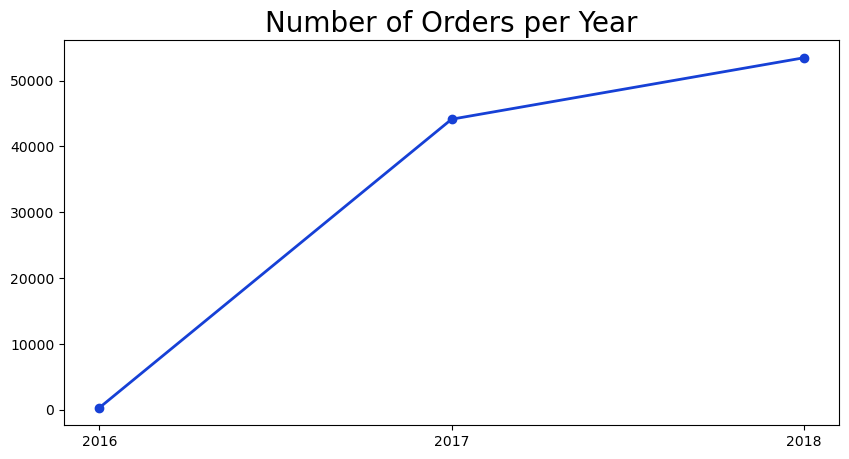

In [359]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_orders_df["order_approved_at"],
    yearly_orders_df["order_count"],
    marker="o",
    linewidth=2,
    color="#1640D6"
)
plt.title("Number of Orders per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

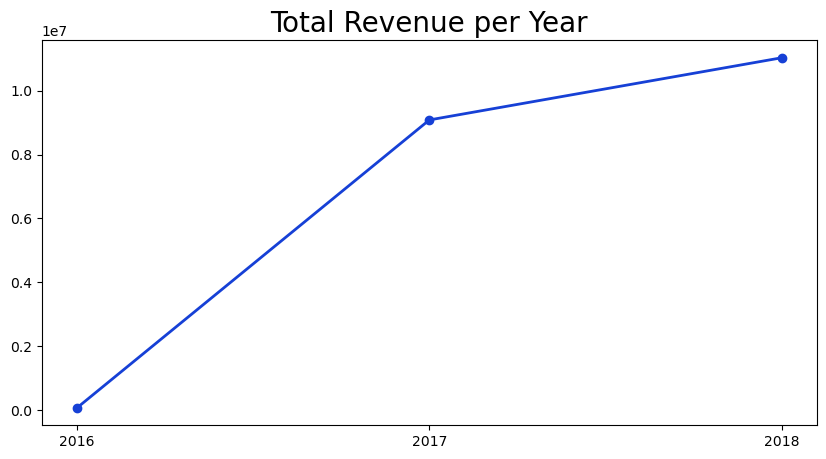

In [360]:
plt.figure(figsize=(10, 5))
plt.plot(
    yearly_orders_df["order_approved_at"],
    yearly_orders_df["revenue"],
    marker='o',
    linewidth=2,
    color="#1640D6"
)
plt.title("Total Revenue per Year", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2 : Produk Apa yang memiliki harga termahal dan terendah?


In [361]:
price_products_df = all_df.groupby("product_category_name").price.max().sort_values(ascending=False).reset_index()
price_products_df.head(10)

,product_category_name,price
0,utilidades_domesticas,6735.00
1,pcs,6729.00
2,artes,6499.00
3,eletroportateis,4799.00
4,instrumentos_musicais,4399.87
5,consoles_games,4099.99
6,esporte_lazer,4059.00
7,relogios_presentes,3999.90
8,cama_mesa_banho,3980.00
9,ferramentas_jardim,3930.00


In [362]:
price_products_df.tail(10)

,product_category_name,price
63,alimentos,274.99
64,fashion_underwear_e_moda_praia,259.00
65,pc_gamer,239.00
66,casa_conforto_2,219.99
67,fashion_roupa_feminina,198.90
68,seguros_e_servicos,183.29
69,fraldas_higiene,139.89
70,fashion_roupa_infanto_juvenil,110.00
71,flores,65.90
72,cds_dvds_musicais,65.00


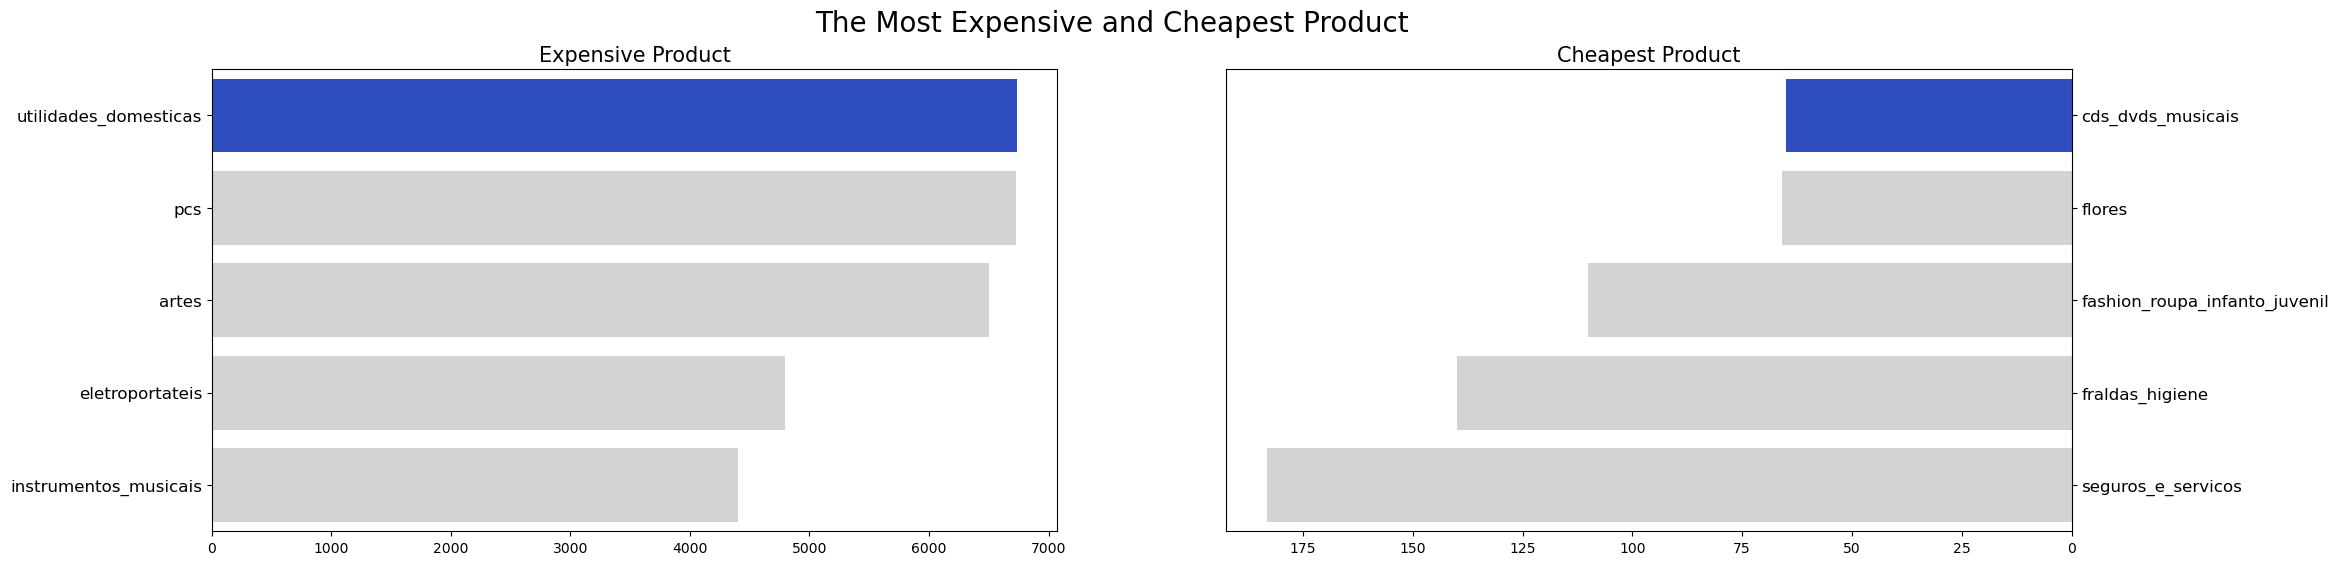

In [363]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#1640D6", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "price",
    y = "product_category_name",
    data = price_products_df.head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Expensive Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x = "price",
    y = "product_category_name",
    data = price_products_df.sort_values(by="price", ascending=True).head(5),
    palette = colors,
    ax = ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Cheapest Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("The Most Expensive and Cheapest Product", fontsize=20)
plt.show()

### Pertanyaan 3 : Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?




In [364]:
sum_order_items_df = all_df.groupby("product_category_name").order_item_id.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(10)

,product_category_name,order_item_id
0,cama_mesa_banho,14956
1,moveis_decoracao,12343
2,beleza_saude,11662
3,esporte_lazer,10455
4,informatica_acessorios,10305
5,utilidades_domesticas,9773
6,relogios_presentes,6917
7,ferramentas_jardim,6179
8,telefonia,5420
9,automotivo,5188


In [365]:
sum_order_items_df.tail(10)

,product_category_name,order_item_id
63,fashion_esporte,41
64,casa_conforto_2,40
65,flores,37
66,artes_e_artesanato,28
67,la_cuisine,18
68,cds_dvds_musicais,16
69,portateis_cozinha_e_preparadores_de_alimentos,16
70,pc_gamer,12
71,fashion_roupa_infanto_juvenil,8
72,seguros_e_servicos,2


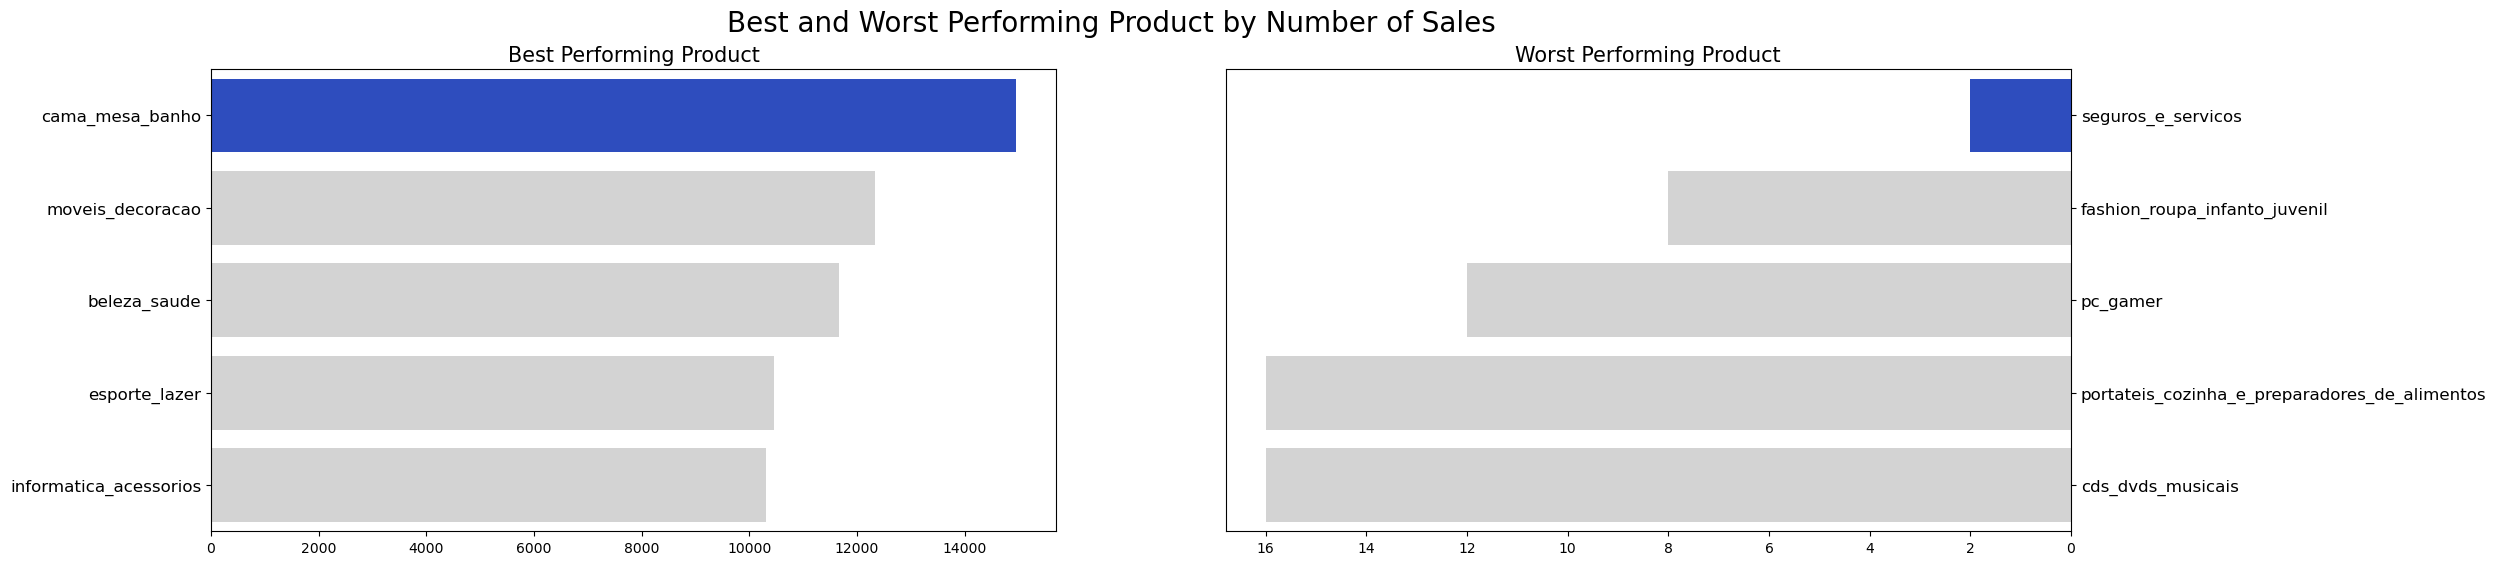

In [366]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#1640D6", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "order_item_id",
    y = "product_category_name",
    data = sum_order_items_df.head(5),
    palette = colors,
    ax = ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

sns.barplot(
    x = "order_item_id",
    y = "product_category_name",
    data = sum_order_items_df.sort_values(by="order_item_id", ascending=True).head(5),
    palette = colors,
    ax = ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


### Pertanyaan 4 : Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?




In [367]:
sum_type_payment_df = all_df.groupby("payment_type").customer_id.nunique().sort_values(ascending=False).reset_index()
sum_type_payment_df.head()

,payment_type,customer_id
0,credit_card,75408
1,boleto,19471
2,voucher,3731
3,debit_card,1514


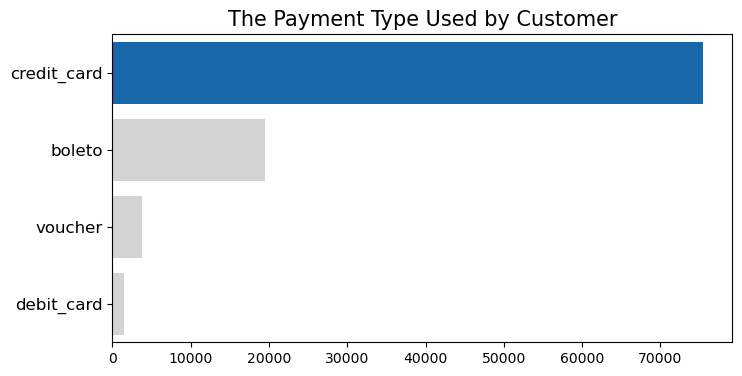

In [368]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colors = ["#0069C0", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x = "customer_id",
    y = "payment_type",
    data = sum_type_payment_df,
    palette = colors
)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("The Payment Type Used by Customer", loc="center", fontsize=15)
ax.tick_params(axis ='y', labelsize=12)


### Pertanyaan 5 : RFM Analysis

- Kapan terakhir pelanggan melakukan transaksi?
- Seberapa sering seorang pelanggan melakukan pembelian?
- Berapa banyak uang yang telah dihabiskan oleh pelanggan?

In [369]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_approved_at": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value" : "sum" # menghitung jumlah pengeluaran yang dikeluarkan pelanggan
})

rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
# max_order_timestamp > parameter yang digunakan utk melihat tanggal terakhir kali melakukan order
# frequency > parameter yang digunakan untuk mengidentifikasi seberapa sering pelanggan melakukan transaksi
# monetary > parameter yang digunakan untuk mengidentifikasi seberapa besar pengeluaran yang dikeluarkan pelanggan

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:35:32,1,114.74
1,000161a058600d5901f007fab4c27140,2017-07-16 09:55:12,1,67.41
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:15:20,1,195.42
3,0002414f95344307404f0ace7a26f1d5,2017-08-17 03:10:27,1,179.35
4,000379cdec625522490c315e70c7a9fb,2018-04-04 03:10:19,1,107.01


In [370]:
# untuk dapat menghitung kapan terakhir pelanggan melakukan transaksi (hari)

rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_approved_at"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
# recency > parameter yg digunakan untuk melihat kapan terakhir seorang pelanggan melakukan transaksi

rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,114.74,293
1,000161a058600d5901f007fab4c27140,2017-07-16,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,2017-08-17,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,2018-04-04,1,107.01,152


In [371]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,114.74,293
1,000161a058600d5901f007fab4c27140,1,67.41,414
2,0001fd6190edaaf884bcaf3d49edf079,1,195.42,552
3,0002414f95344307404f0ace7a26f1d5,1,179.35,382
4,000379cdec625522490c315e70c7a9fb,1,107.01,152


In [372]:
rfm_df.describe(include="all")

,customer_id,frequency,monetary,recency
count,97917,97917.0,97917.000000,97917.000000
unique,97917,NaN,NaN,NaN
top,00012a2ce6f8dcda20d059ce98491703,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,1.0,206.173889,244.988756
std,NaN,0.0,608.561238,153.382048
min,NaN,1.0,0.000000,0.000000
25%,NaN,1.0,62.860000,121.000000
50%,NaN,1.0,110.080000,226.000000
75%,NaN,1.0,196.260000,355.000000


In [373]:
recency_df = rfm_df.groupby("recency").customer_id.nunique().reset_index()
recency_df.sort_values(by="recency", ascending=True).head(5)

,recency,customer_id
0,0,1
1,5,15
2,6,56
3,7,63
4,8,70


Text(0.5, 0.98, 'Best Customer Based on RFM Parameters (customer_id)')

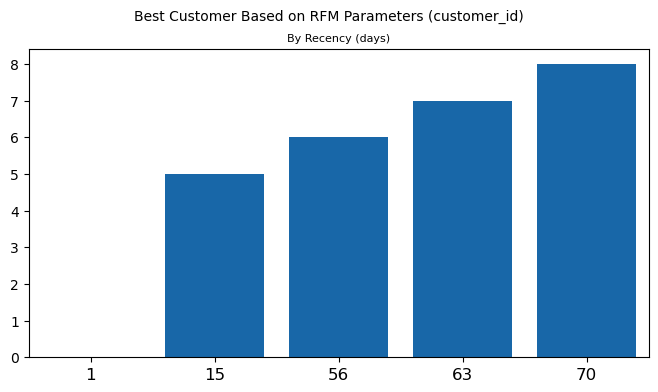

In [374]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colors = ["#0069C0", "#0069C0", "#0069C0", "#0069C0", "#0069C0"]

sns.barplot(
    y="recency",
    x="customer_id",
    data=recency_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Recency (days)", loc="center", fontsize=8)
ax.tick_params(axis ='x', labelsize=12)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=10)


In [375]:
frequency_df = rfm_df.groupby(by="frequency").customer_id.nunique().reset_index()
frequency_df.sort_values(by="frequency", ascending=False).head(5)

,frequency,customer_id
0,1,97917


Text(0.5, 0.98, 'Best Customer Based on RFM Parameters (customer_id)')

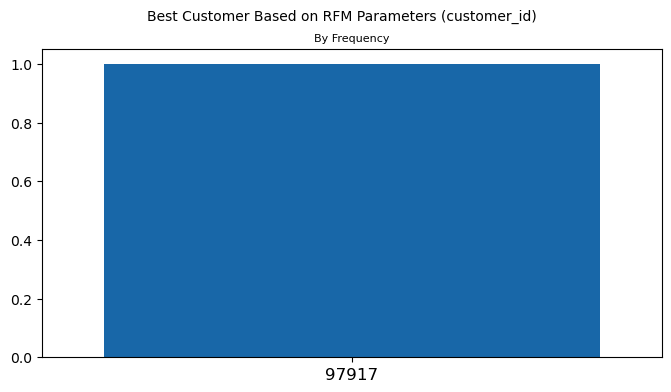

In [376]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colors = ["#0069C0", "#0069C0", "#0069C0", "#0069C0", "#0069C0"]

sns.barplot(
    y="frequency",
    x="customer_id",
    data=frequency_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Frequency", loc="center", fontsize=8)
ax.tick_params(axis ='x', labelsize=12)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=10)

In [377]:
monetary_df = rfm_df.groupby("monetary").customer_id.nunique().reset_index()
monetary_df.sort_values(by="monetary", ascending=False).head(5)

,monetary,customer_id
30075,109312.64,1
30074,44048.00,1
30073,36489.24,1
30072,30186.00,1
30071,29099.52,1


Text(0.5, 0.98, 'Best Customer Based on RFM Parameters (customer_id)')

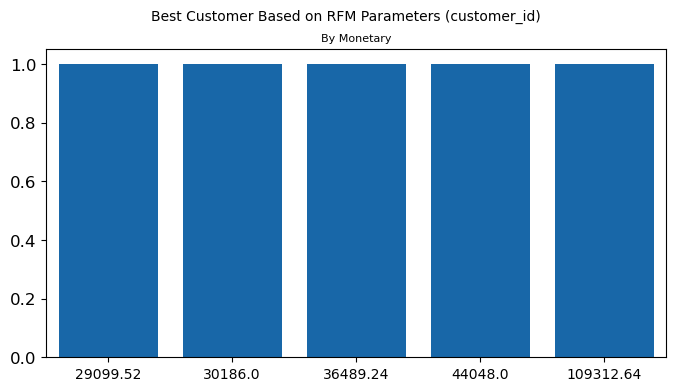

In [378]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 4))

colors = ["#0069C0", "#0069C0"]

sns.barplot(
    y="customer_id",
    x="monetary",
    data=monetary_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title("By Monetary", loc="center", fontsize=8)
ax.tick_params(axis ='y', labelsize=12)
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=10)

## Conclusion

- Pertanyaan 1 : Bagaimana Performa Penjualan dan Revenue Perusahaan dalam Beberapa Tahun Terakhir?

  Performa penjualan dan revenue perusahaan dalam beberapa tahun terakhir selalu mengalami peningkatan yaitu pada tahun 2016-2017 mengalami peningkatan dari 73238.88 di tahun 2016 menjadi 9084288.80 di tahun 2017 dan pada tahun 2017-2018 mengalami peningkatan kembali dari 9084288.80 di tahun 2017 menjadi 11030401.02 di tahun 2018.

- Pertanyaan 2 : Produk Apa yang memiliki harga termahal dan terendah?

  Produk yang memiliki harga termahal adalah produk utilidades_domesticas dengan price 6735.00 sedangkan produk yang memiliki harga terendah adalah produk cds_dvds_musicais dengan price 65.00.

- Pertanyaan 3 : Produk Apa yang Paling Banyak dan Paling Sedikit Terjual?

  Produk yang paling banyak terjual adalah produk cama_mesa_banho dimana produk ini terjual sebanyak 14956	sedangkan produk paling sedikit terjual adalah produk seguros_e_servicos dimana produk ini hanya terjual sebanyak 2 item saja.

- Pertanyaan 4 : Metode pembayaran apa yang paling banyak digunakan oleh pelanggan?

  Metode pembayaran yang paling banyak digunakan oleh pelanggan adalah metode pembayaran dengan menggunakan credit_card. Sebanyak 75408 pelanggan lebih memilih metode pembayaran dengan menggunakan credit_card daripada menggunakan debit_card.

- Pertanyaan 5 : Kapan terakhir pelanggan melakukan transaksi?

  Saat pesanan sudah disetujui pelanggan yang melakukan transaksi terakhir kali adalah hari ini (0 hari).

- Pertanyaan 6 : Seberapa sering seorang pelanggan melakukan pembelian?

  Seluruh pelanggan hanya melakukan pembelian sebanyak satu kali, hal ini dapat disimpulkan bahwa seluruh pelanggan tidak terlalu sering melakukan pembelian produk.

- Pertanyaan 7 : Berapa banyak uang yang telah dihabiskan oleh pelanggan?

  Rata-rata uang yang telah dihabiskan pelanggan sekitar 206.173889 dan uang yang paling banyak pernah dihabiskan seorang pelanggan sekitar 109312.64.